In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# part a

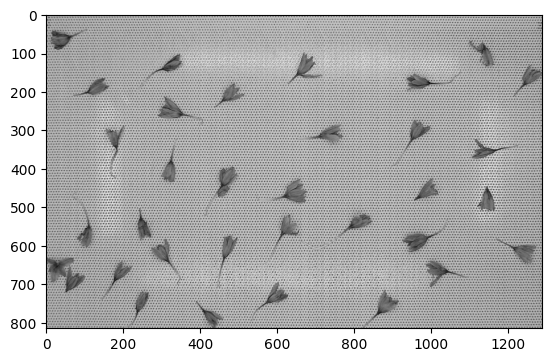

In [2]:
# read saffrun image
image = cv2.imread("saffrun.jpg", cv2.IMREAD_GRAYSCALE)
w, h = image.shape[0] , image.shape[1]
plt.imshow(image, cmap='gray')
plt.show()

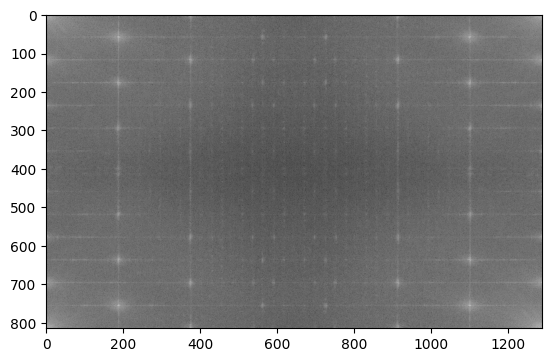

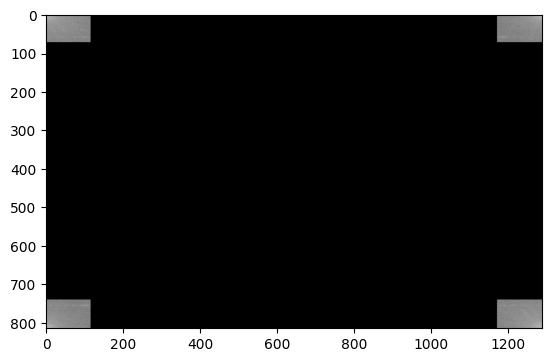

In [3]:
# perform fft (2D fourier transform)
FFT_image = np.fft.fft2(image)
plt.imshow(np.log(1+np.abs(FFT_image)), cmap='gray')
plt.show()
# set noisy points to 0
k=0.09
FFT_image [int(w*k):int(w*(1-k))] = 0
FFT_image [:,int(h*k):int(h*(1-k))] = 0
plt.imshow(np.log(1+np.abs(FFT_image)), cmap='gray')
plt.show()

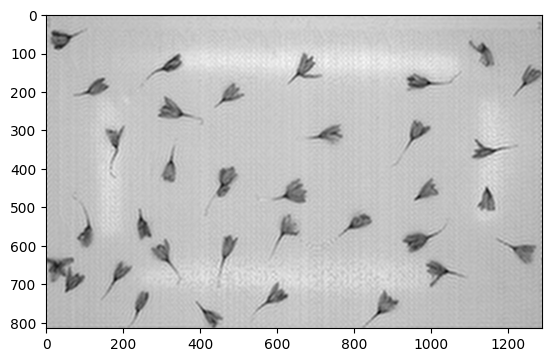

In [4]:
 # apply IFFT (2d fourier transform)
iFFT_image = np.real(np.fft.ifft2(FFT_image))
plt.imshow(iFFT_image, cmap='gray')
plt.show()

# part b

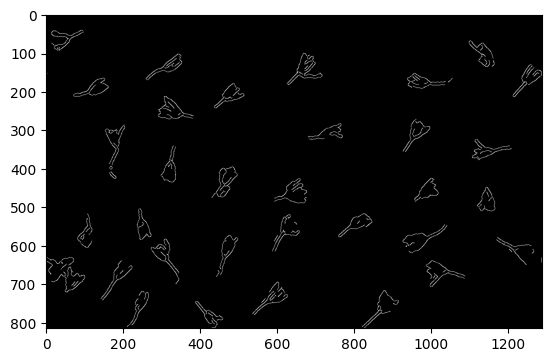

In [6]:
# Canny Edge Detection
CannyImage = cv2.Canny(np.uint8(iFFT_image), 50, 100)
plt.imshow(CannyImage, cmap='gray')
plt.show()

# part c

[[-1.57079633e+00  0.00000000e+00 -3.14159265e+00 ...  1.08413082e-15
   2.05413258e-15 -1.57079633e+00]
 [ 1.57079633e+00  1.24791896e+00  1.76960635e+00 ...  8.12650557e-01
   7.62974587e-01  1.57079633e+00]
 [ 1.57079633e+00  1.44664180e+00  1.85312020e+00 ...  9.65872429e-01
   9.45539642e-01  1.57079633e+00]
 ...
 [-1.57079633e+00 -1.36169488e+00 -2.09320635e+00 ... -7.50753679e-01
  -7.29728840e-01 -1.57079633e+00]
 [-1.57079633e+00 -8.95242125e-01 -2.23058508e+00 ... -5.00845133e-01
  -4.75652448e-01 -1.57079633e+00]
 [-1.57079633e+00  0.00000000e+00  3.14159265e+00 ...  0.00000000e+00
   1.97942839e-15  0.00000000e+00]]


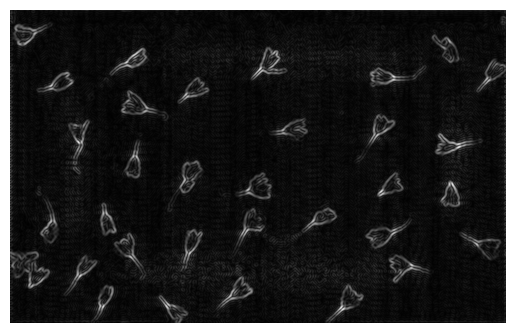

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


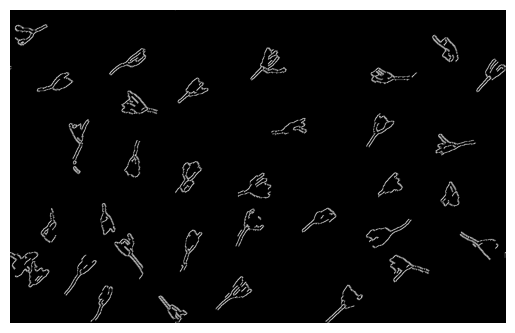

In [7]:
sobel_x = np.array([
     [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]], dtype=np.int32)
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]], dtype=np.int32)
gx = cv2.filter2D(iFFT_image, ddepth=-1, kernel=sobel_x)
gy = cv2.filter2D(iFFT_image, ddepth=-1, kernel=sobel_y)
mag = np.sqrt(gx**2 + gy**2)
dirs = np.arctan2(gy, gx)
print(dirs)
plt.imshow(mag, cmap="gray")
plt.axis('off')
plt.show()

gx2 = cv2.filter2D(CannyImage, ddepth=-1, kernel=sobel_x)
gy2 = cv2.filter2D(CannyImage, ddepth=-1, kernel=sobel_y)
mag2 = np.sqrt(gx2**2 + gy2**2)
dirs2 = np.arctan2(gy2, gx2)
print(dirs2)
plt.imshow(mag2, cmap="gray")
plt.axis('off')
plt.show()